In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

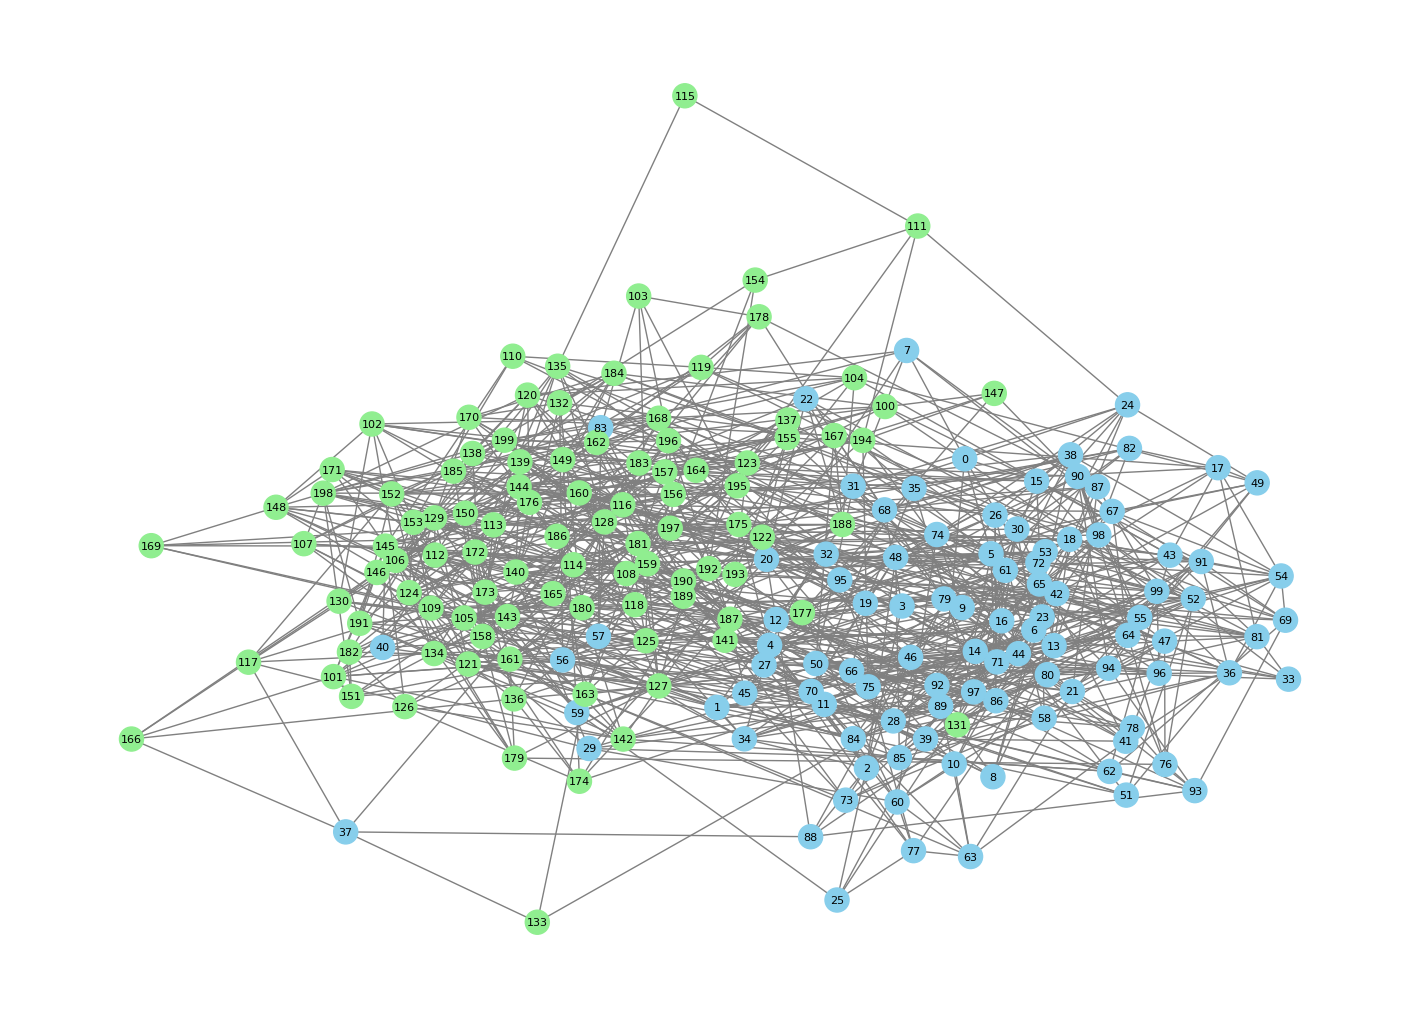

In [2]:
def create_community_graph(n_nodes, avg_degree):
    p = avg_degree / (n_nodes - 1)  # 计算生成ER随机图的连边概率
    return nx.erdos_renyi_graph(n_nodes, p)

def connect_communities(G1, G2, avg_inter_degree):
    n1 = len(G1)
    n2 = len(G2)
    n_inter_edges = int(avg_inter_degree * (n1 + n2) / 2)  # 计算要添加的跨社区边数
    
    G = nx.disjoint_union(G1, G2)  # 将两个社区图结合为一个图

    nodes_community1 = list(G1.nodes)
    nodes_community2 = list(G2.nodes)

    while n_inter_edges > 0:
        node1 = np.random.choice(nodes_community1)
        node2 = np.random.choice(nodes_community2) + n1  # 因为G2的节点索引已经被偏移
        if not G.has_edge(node1, node2):
            G.add_edge(node1, node2)
            n_inter_edges -= 1

    return G

n_nodes_community1 = 100
n_nodes_community2 = 100
avg_intra_degree = 8
avg_inter_degree = 2

G1 = create_community_graph(n_nodes_community1, avg_intra_degree)
G2 = create_community_graph(n_nodes_community2, avg_intra_degree)

G = connect_communities(G1, G2, avg_inter_degree)

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=300, font_size=8, node_color=['skyblue']*n_nodes_community1 + ['lightgreen']*n_nodes_community2, edge_color='gray')
plt.show()

In [23]:
def iterate_likelihood(A, k, c, n, epsilon=1e-6, max_iter=1000):
    """
    Iterate the likelihood algorithm given the input matrices and parameters.
    
    Parameters:
        A (np.ndarray): The matrix A with shape (n, c).
        k (np.ndarray): The array k with length n.
        c (int): Number of columns in A (number of categories).
        n (int): Number of rows in A (number of samples).
        epsilon (float): Convergence threshold.
        max_iter (int): Maximum number of iterations.
    
    Returns:
        np.ndarray: The final values of π_r.
        np.ndarray: The final values of θ_rj.
    """
    # Initialize π and θ with small random perturbations around the symmetric choice
    np.random.seed(42)
    pi = np.random.rand(c)
    pi = pi / pi.sum()
    theta = np.random.rand(c, n)
    theta = theta / theta.sum(axis=1, keepdims=True)
    # print(pi)
    
    # Compute q_ir
    q = np.zeros((n, c))
    
    for iteration in range(max_iter):
        # print(iteration)
        # Save old values for convergence check
        pi_old = pi.copy()
        theta_old = theta.copy()
        
        for i in range(n):
            for r in range(c):
                numerator = pi[r] * np.prod(theta[r, :] ** A[i, :])
                denominator = sum(pi[s] * np.prod(theta[s, :] ** A[i, :]) for s in range(c))
                q[i, r] = numerator / denominator
        
        # Update π_r and θ_rj
        pi = np.sum(q, axis=0) / n
        for r in range(c):
            for j in range(n):
                theta[r, j] = np.sum(A[:, j] * q[:, r]) / np.sum(k * q[:, r])
    
        # Check for convergence
        if np.allclose(pi, pi_old, atol=epsilon) and np.allclose(theta, theta_old, atol=epsilon):
            break
    
    return pi, theta

In [24]:
A = nx.adjacency_matrix(G)

A = A.toarray()

k = np.array([degree for node, degree in G.degree()])
c = 2
n = A.shape[0]

pi, theta = iterate_likelihood(A, k, c, n)
print("Final π values:", pi)
print("Final θ values:", theta)

Final π values: [0.47935316 0.52064684]
Final θ values: [[6.15509242e-003 6.16144578e-003 1.12940463e-002 5.13339731e-003
  1.12785269e-002 1.12813349e-002 1.33487457e-002 6.16154888e-003
  4.10778089e-003 8.21318473e-003 6.16139626e-003 7.17842189e-003
  8.21518229e-003 9.24063272e-003 1.12965975e-002 8.21557207e-003
  6.16164885e-003 8.21535067e-003 1.33287985e-002 5.13734659e-003
  1.11704285e-002 9.24165893e-003 4.10797231e-003 1.23194418e-002
  7.18853543e-003 4.10685741e-003 9.24028992e-003 8.19779895e-003
  1.43772394e-002 4.10775630e-003 8.21479967e-003 1.12581942e-002
  6.15147985e-003 5.12052135e-003 8.21556194e-003 5.12047039e-003
  1.02694567e-002 2.05714664e-003 7.18732592e-003 6.14670401e-003
  3.06457340e-003 7.18861969e-003 8.22514682e-003 7.18861969e-003
  1.12958550e-002 4.10731365e-003 1.12939733e-002 5.12292290e-003
  1.33361225e-002 7.18859812e-003 1.12892801e-002 6.16167402e-003
  1.23232566e-002 5.13235503e-003 1.23233480e-002 1.23222544e-002
  5.13390005e-003 5.

Color counts: {'blue': 99, 'red': 101}


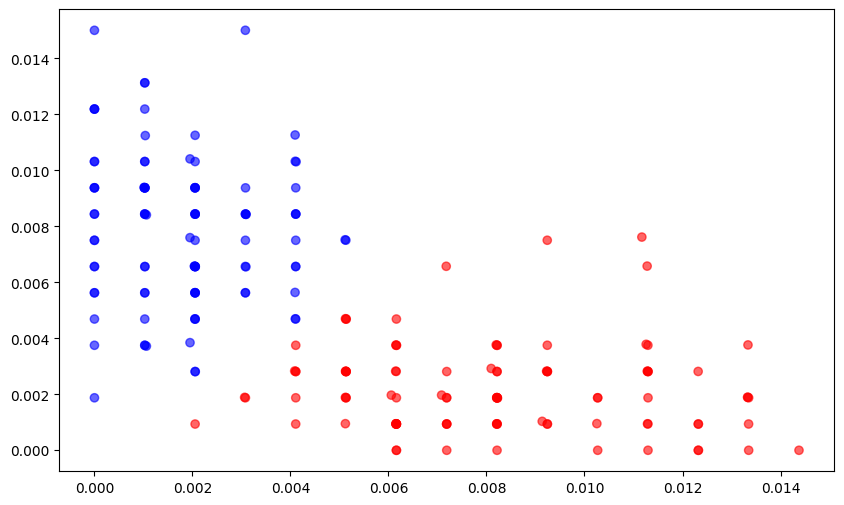

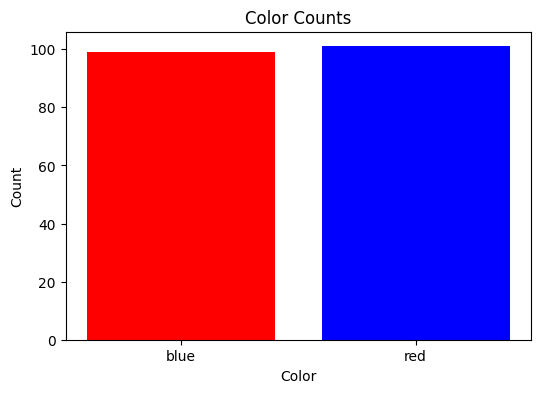

In [26]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42) 
data = theta

colors = np.where(data[0, :] > data[1, :], 'red', 'blue')

unique, counts = np.unique(colors, return_counts=True)
color_counts = dict(zip(unique, counts))

# 打印统计结果
print("Color counts:", color_counts)

# 可视化结果
plt.figure(figsize=(10, 6))

# 绘制点
plt.scatter(data[0, :], data[1, :], c=colors, alpha=0.6)

# 绘制颜色统计条形图
plt.figure(figsize=(6, 4))
plt.bar(color_counts.keys(), color_counts.values(), color=['red', 'blue'])
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Color Counts')

plt.show()
